In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from matplotlib import pyplot as plt
import Problem_1 as my
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2



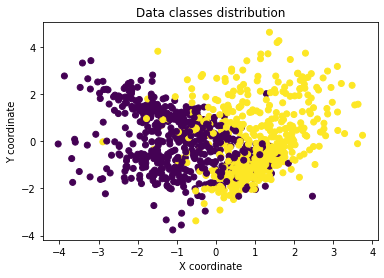

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data classes distribution")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")

# Split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2)

model = LinearRegression()#LogisticRegression()
model.fit(train_x, train_y)
probs = model.predict(test_x)

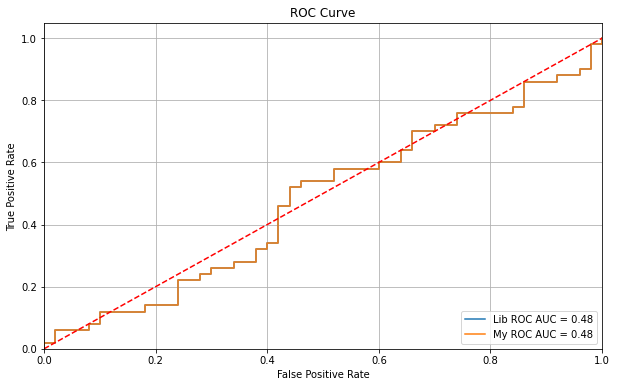

In [11]:
test_y = np.random.random_sample(100) - 0.5 >= 0#np.array([0, 1, 0,1,0,0,1,0,0,0,0,1,1,1,0,1, 1, 1, 1,1,1,0,0,0,1,0,1])
labels, confidence = my.coin_flip(test_y)
probs = np.array([i if label else 1 - i for label, i in zip(labels, confidence)])

fpr, tpr = my.get_roc_curve(probs, test_y)
lib_fpr, lib_tpr, _ = roc_curve(test_y, probs)

my_roc_auc = my.auc(fpr, tpr)
lib_roc_auc = auc(lib_fpr, lib_tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Lib ROC AUC = {lib_roc_auc:.2f}')
plt.plot(fpr, tpr, label=f'My ROC AUC = {my_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right");



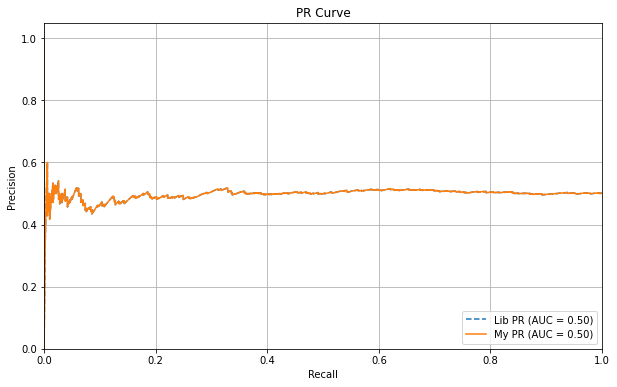

In [6]:
rec, prs = my.get_pr_curve(probs, test_y)
my_pr_auc = my.auc(rec, prs)
lib_prs, lib_rec, _ = precision_recall_curve(test_y, probs)
lib_pr_auc = auc(lib_rec, lib_prs)
plt.figure(figsize=(10, 6))

plt.plot(lib_rec, lib_prs, '--', label=f'Lib PR (AUC = {lib_pr_auc:.2f})')
plt.plot(rec, prs, label=f'My PR (AUC = {my_pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.grid()
plt.legend(loc="lower right");